In [1]:
import numpy as np
import math
import networkx as nx 
import matplotlib.pyplot as plt
from texttable import Texttable #Import Texttable function from texttable library to draw tables

# Cryptanalysis
## Generating normalized frequency distribution of English letters for a given text

In [2]:
def histogram(text,print_flag = 0):
    #A vector of length 26 (number of letters in English Alphabet)
    frequency = np.zeros(26)
    
    # Encrypting plain text using the key given by shift_key parameter 
    for ii in range(0,len(text)):
        text_char = text[ii]
        # Uppercase characters in text (Note: In ASCII table letter "A" is assigned 65)
        if (text_char.isupper()):
            text_char_index = ord(text_char) - 65
            frequency[text_char_index] += 1
        # Lowercase characters in text (Note: In ASCII table letter "a" is assigned 97)
        elif (text_char.islower()):
            text_char_index = ord(text_char) - 97
            frequency[text_char_index] += 1
        #Spaces, special characters such as ".","#",":", " " (space), etc... will not be encrypted
        
    hist = frequency/np.sum(frequency)
    
    if print_flag == 1:
        #Plotting the histogram 
        fig, ax = plt.subplots(figsize=(20, 10))

        # now, define the ticks (i.e. locations where the labels will be plotted)
        xticks = [ii for ii in range(26)]
    
        # create the histogram
        ax.bar(xticks, hist) # `align='left'` is used to center the labels

        # also define the labels we'll use (note this MUST have the same size as `xticks`!)
        xtick_labels = [chr(ii+65) for ii in range(26)]

        # add the ticks and labels to the plot
        ax.set_xticks(xticks)
        ax.set_xticklabels(xtick_labels)
        ax.set_ylabel('Normalized frequency', fontsize=30)
        ax.set_xlabel('Letters', fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=25)
        ax.tick_params(axis='both', which='minor', labelsize=25)

        plt.show()
        
        t1 = Texttable() #Creating an empty table
        t2 = Texttable() #Creating an empty table
    
        #Creating first table (Plain text from "a"(0) to "m"(12))
        t1_row_1 = xtick_labels[0:13]
        t1_row_1.insert(0,'Letters')
        t1.add_row(t1_row_1)
        t1_row_2 = hist[0:13].tolist()
        t1_row_2.insert(0,'Norm. freq.')
        t1.add_row(t1_row_2)
    
        #Creating second table (Plain text from "n"(13) to "z"(25))
        t2_row_1 = xtick_labels[13:]
        t2_row_1.insert(0,'Letters')
        t2.add_row(t2_row_1)
        t2_row_2 = hist[13:].tolist()
        t2_row_2.insert(0,'Norm. freq.')
        t2.add_row(t2_row_2)
        
        t1.set_cols_align(["c"]*14)
        t2.set_cols_align(["c"]*14)
        
        col_width = 5*np.ones(14)
        col_width[0] += 2.5
        t1.set_cols_width(col_width)
        t2.set_cols_width(col_width)
        
        #Draw two tables 
        print(t1.draw())
        print(t2.draw())

    
    return hist  

text : Cryptanalysis is the study of ciphertext, ciphers and cryptosystems with the aim of understanding how they work and finding and improving techniques for defeating or weakening them. For example, cryptanalysts seek to decrypt ciphertexts without knowledge of the plaintext source, encryption key or the algorithm used to encrypt it; cryptanalysts also target secure hashing, digital signatures and other cryptographic algorithms.


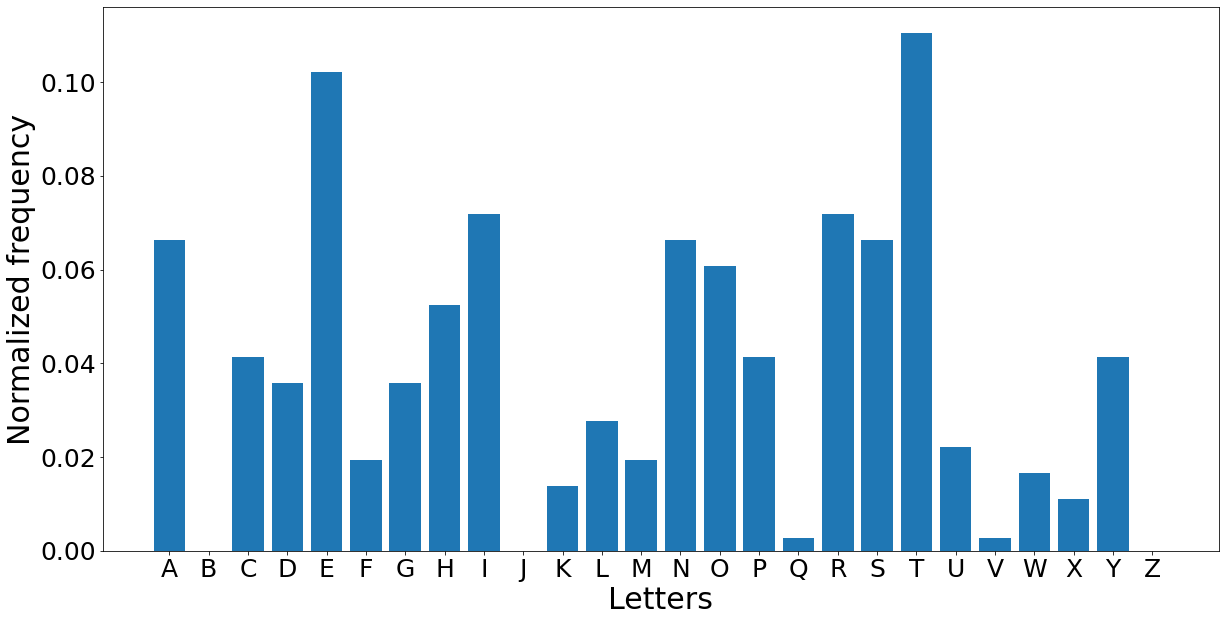

+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Letters |   A   |   B   |   C   |   D   |   E   |   F   |   G   |   H   |   I   |   J   |   K   |   L   |   M   |
+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|  Norm.  | 0.066 |   0   | 0.041 | 0.036 | 0.102 | 0.019 | 0.036 | 0.052 | 0.072 |   0   | 0.014 | 0.028 | 0.019 |
|  freq.  |       |       |       |       |       |       |       |       |       |       |       |       |       |
+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Letters |   N   |   O   |   P   |   Q   |   R   |   S   |   T   |   U   |   V   |   W   |   X   |   Y   |   Z   |
+---------+-------+-------+-------+-------+-------+-------+-------+-----

In [3]:
#check the above function
text = "Cryptanalysis is the study of ciphertext, ciphers and cryptosystems with the aim of understanding how they work and finding and improving techniques for defeating or weakening them. For example, cryptanalysts seek to decrypt ciphertexts without knowledge of the plaintext source, encryption key or the algorithm used to encrypt it; cryptanalysts also target secure hashing, digital signatures and other cryptographic algorithms."

print("text : " + text)
histogram(text,1);
#print("Histogram : ", histogram(text,1))

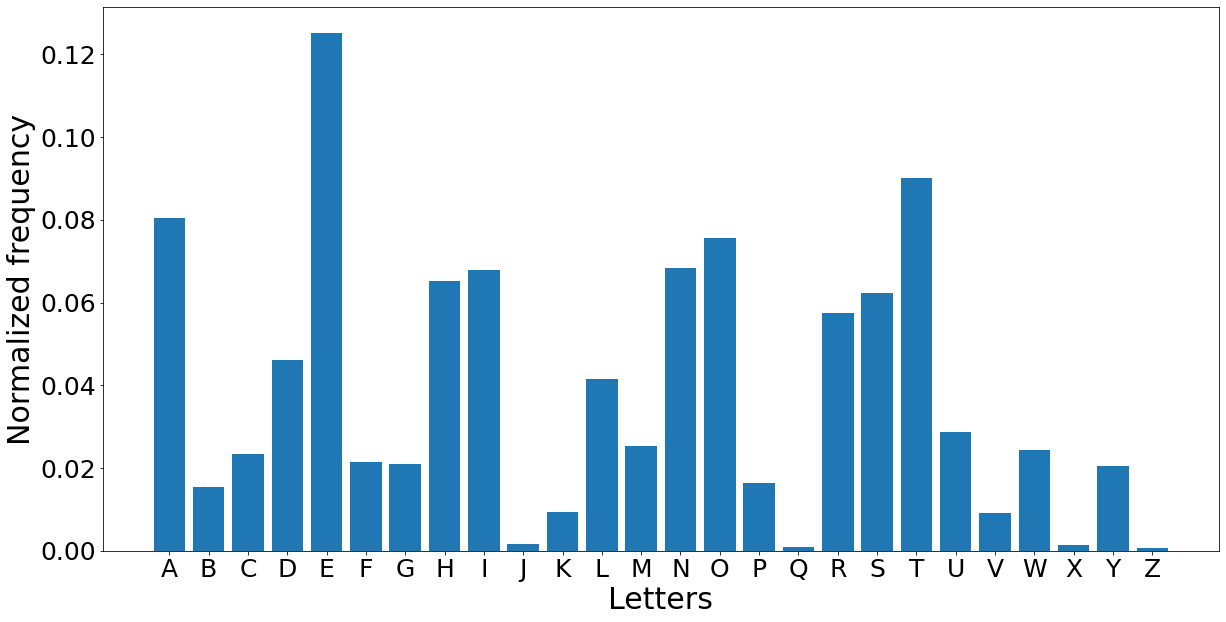

+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Letters |   A   |   B   |   C   |   D   |   E   |   F   |   G   |   H   |   I   |   J   |   K   |   L   |   M   |
+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|  Norm.  | 0.080 | 0.015 | 0.023 | 0.046 | 0.125 | 0.022 | 0.021 | 0.065 | 0.068 | 0.002 | 0.009 | 0.042 | 0.025 |
|  freq.  |       |       |       |       |       |       |       |       |       |       |       |       |       |
+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Letters |   N   |   O   |   P   |   Q   |   R   |   S   |   T   |   U   |   V   |   W   |   X   |   Y   |   Z   |
+---------+-------+-------+-------+-------+-------+-------+-------+-----

In [4]:
input_file = open("sampleFICT.txt") 
text = input_file.read()
hist = histogram(text,1)
input_file.close()

#print("Histogram : ", hist)

# Kasiski Test

In [5]:
def find_pattern(letter_string, pattern):
    pattern_len = len(pattern)
    letter_string_len =len(letter_string)
    
    pattern_start_index = []
    start = 0
    end = pattern_len
    
    while end <= letter_string_len:
        tmp_str = letter_string[start:end]

        if tmp_str == pattern:
            pattern_start_index.append(start)
            
        start += 1
        end += 1
    
    return pattern_start_index

In [6]:
def kasiski_test(text_):
    P = [0.082, 0.015, 0.028, 0.043, 0.127, 0.022, 0.02, 0.061, 0.07, 0.002, 0.008, 0.04, 0.024, 0.067, 0.075, 0.019, 0.001, 0.06, 0.063, 0.091, 0.028, 0.01, 0.023, 0.001, 0.02, 0.001]

    text = ''
    for ii in range(0,len(text_)):
        text = text + text_[ii].replace('\n','')
        
    #print(text)
    text_len =len(text)
    letter_string = ''
    
    #Record cipher text letters
    for ii in range(0,text_len):
        char = text[ii]
        # Uppercase characters in plain text (Note: In ASCII table letter "A" is assigned 65)
        if (char.isupper()):
            letter_string = letter_string + char
        # Lowercase characters in plain text (Note: In ASCII table letter "a" is assigned 97)
        elif (char.islower()):
            letter_string = letter_string + chr(ord(char) - 97 + 65) #converting lowercase to uppercase letters
    
    letter_string_len = len(letter_string)
    #print(letter_string)
    Pattern_info = []
    
    for ll in range(3,round(letter_string_len/2)): #length of the pattern
        for ii in range(0, letter_string_len):
            if ii + ll <= letter_string_len:
                
                pattern = letter_string[ii:ii+ll]
                patterns_found = [Pattern_info[mm][0] for mm in range(len(Pattern_info))]
                if pattern not in patterns_found:
                
                    pattern_start_index = find_pattern(letter_string, pattern)
                    
            
                    if len(pattern_start_index) > 1:
                        pattern_info_tmp = []
                        pattern_info_tmp.append(pattern)
                        pattern_info_tmp.append(pattern_start_index)
                        Pattern_info.append(pattern_info_tmp)
    
    
    #Choosing the pattern that has the most repititions
    num_patterns = len(Pattern_info)
    max_val = 0
    max_index = 0
    for ii in range(0,num_patterns):
        if max_val < len(Pattern_info[ii][1]):
            max_val = len(Pattern_info[ii][1])
            max_index = ii
        
    int_list = Pattern_info[max_index][1]
    
    #Getting the gcd between numbers 
    gcd_val = math.gcd(int_list[0],int_list[1])
    for ii in range(2,len(int_list)):
        gcd_val = math.gcd(gcd_val,int_list[ii])
    
    print('Key length is:', gcd_val)
    
    m = gcd_val
    
    #Creating sub strings
    sub_strings = []
    
    for ii in range(0,m):
        sub_strings.append('')
        
    jj = 0
    for ii in range(0,letter_string_len):
        sub_strings[jj] += letter_string[ii]
        jj += 1
        if jj == m:
            jj = 0
    
    #Creating the histograms 
    hist_info  = []
    Key = []
    max_val_orig = max(P)
    index_max_orig = P.index(max_val_orig)
    for ii in range(0,m):
        hist_data = histogram(sub_strings[ii],0) #"1" to draw or nor draw histogram 
        #print(hist_data)
        hist_info.append(hist_data)
        max_val = max(hist_data)
        index_max = hist_data.tolist().index(max_val)
        Key_val = index_max - index_max_orig
        Key.append(Key_val)
        
    
    
    return Pattern_info, Key

In [7]:
input_file = open("Example.txt",'r') 
text =  input_file.readlines()
print(text)
Pattern_info, Key = kasiski_test(text)
print('\nAll patterns found:\n')
for ii in range(0,len(Pattern_info)):
    print('Pattern:', Pattern_info[ii][0])
    print('Starting index:', Pattern_info[ii][1])
    print('------------------------------')
    
print('\nKey:\n', Key)

['CHREEVOAHMAERATBIAXXWTNXBEEOPHBSBQMQEQERBWRVXUOAKXAOSXXWEAHBWGJMMQMNKGRFVGXWTRZXWIAKLXFPSKAUTEMNDCMGTSXMXBTUIADNGMGPSRELXNJELXVRVPRTULHDNQWTWDTYGBPHXTFALJHASVBFXNGLLCHRZBWELEKMSJIKNBHWRJGNMGJSGLXFEYPHAGNRBIEQJTAMRVLCRREMNDGLXRRIMGNSNRWCHRQHAEYEVTAQEBBIPEEWEVKAKOEWADREMXMTBHHCHRTKDNVRZCHRCLQOHPWQAIIWXNRMGWOIIFKEE']
Key length is: 5

All patterns found:

Pattern: CHR
Starting index: [0, 165, 235, 275, 285]
------------------------------
Pattern: XXW
Starting index: [18, 53]
------------------------------
Pattern: XWT
Starting index: [19, 74]
------------------------------
Pattern: LXF
Starting index: [84, 193]
------------------------------
Pattern: EMN
Starting index: [93, 218]
------------------------------
Pattern: MND
Starting index: [94, 219]
------------------------------
Pattern: ELX
Starting index: [118, 123]
------------------------------
Pattern: GLX
Starting index: [192, 222]
------------------------------
Pattern: REM
Starting index: [217, 266]
-----------------------------

# Cryptanalysis using Auto and Cross Correlation

In [8]:
def auto_correlation(text_,m):
    
    text = ''
    for ii in range(0,len(text_)):
        text = text + text_[ii].replace('\n','')
        
    #print(text)
    text_len =len(text)
    letter_string = ''
    
    #Record cipher text letters
    for ii in range(0,text_len):
        char = text[ii]
        # Uppercase characters in plain text (Note: In ASCII table letter "A" is assigned 65)
        if (char.isupper()):
            letter_string = letter_string + char
        # Lowercase characters in plain text (Note: In ASCII table letter "a" is assigned 97)
        elif (char.islower()):
            letter_string = letter_string + chr(ord(char) - 97 + 65) #converting lowercase to uppercase letters
    
    letter_string_len = len(letter_string)
    
    sub_strings = []
    
    for ii in range(0,m):
        sub_strings.append('')
        
    jj = 0
    for ii in range(0,letter_string_len):
        sub_strings[jj] += letter_string[ii]
        jj += 1
        if jj == m:
            jj = 0
    
    hist_info  = []
    for ii in range(0,m):
        hist_data = histogram(sub_strings[ii],0) #To show hist
        #print(hist_data)
        hist_info.append(hist_data)
        
    
        
    auto_corr_info = []
    for ii in range(0,m):
        auto_corr_val = 0
        n = len(sub_strings[ii]) 
        for jj in range(0,26):
            auto_corr_val += hist_info[ii][jj]*n*(hist_info[ii][jj]*n-1)
            
        auto_corr_val_mod = 1/(n*(n-1))*auto_corr_val    
        auto_corr_info.append(auto_corr_val_mod)     
    
    return auto_corr_info, hist_info, sub_strings


def cross_correlation(hist_info):
    P = [0.082, 0.015, 0.028, 0.043, 0.127, 0.022, 0.02, 0.061, 0.07, 0.002, 0.008, 0.04, 0.024, 0.067, 0.075, 0.019, 0.001, 0.06, 0.063, 0.091, 0.028, 0.01, 0.023, 0.001, 0.02, 0.001]
    m = len(hist_info)
    
    cross_corr_info = []
    for ii in range(0,m):
        sub_string_cross_info = []
        for KK in range(0,26):
            cross_corr_val = 0
            for jj in range(0,26):
                cross_corr_val += P[jj]*hist_info[ii][(jj+KK) % 26]
        
            sub_string_cross_info.append(cross_corr_val)
            
        cross_corr_info.append(sub_string_cross_info)
        
    return cross_corr_info    
        

# Cyclic autocorrelation of the frequency distribution of English letters

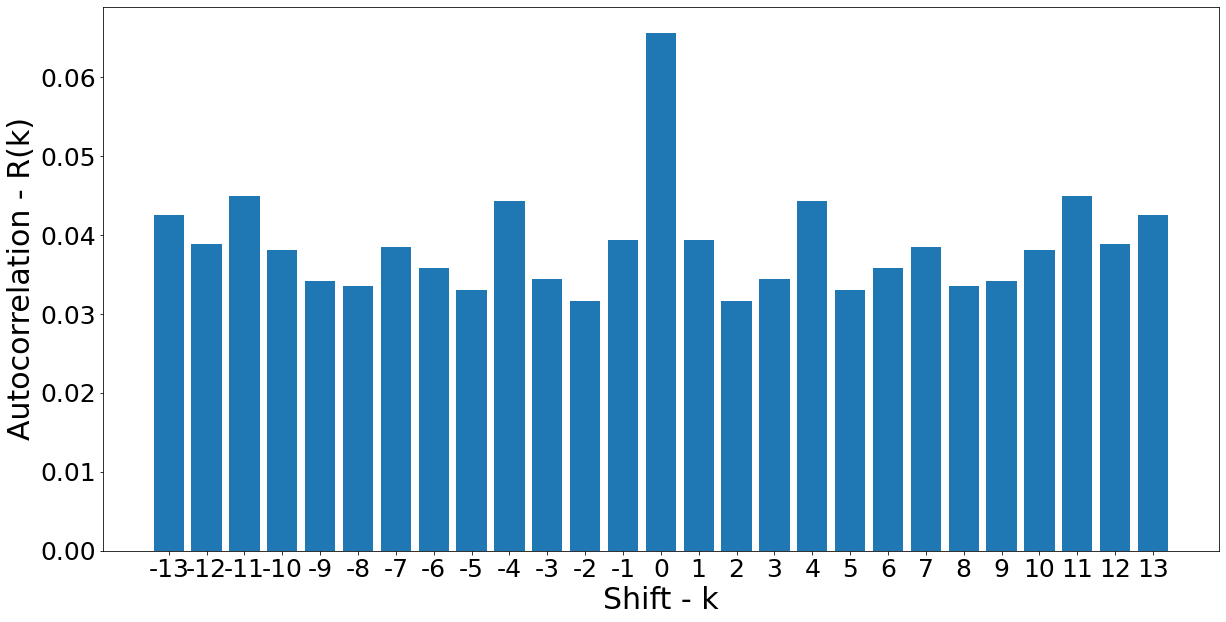

In [9]:
P = [0.082, 0.015, 0.028, 0.043, 0.127, 0.022, 0.02, 0.061, 0.07, 0.002, 0.008, 0.04, 0.024, 0.067, 0.075, 0.019, 0.001, 0.06, 0.063, 0.091, 0.028, 0.01, 0.023, 0.001, 0.02, 0.001]
R = []

for kk in range(-13, 14):
    corr_val = 0
    for ii in range(0,26):
        corr_val += P[(ii + kk) % 26]*P[ii]
    R.append(corr_val)

    
fig, ax = plt.subplots(figsize=(20, 10))
xticks = [ii for ii in range(-13,14)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_ylabel('Autocorrelation - R(k)', fontsize=30)
ax.set_xlabel('Shift - k', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

ax.bar(xticks, R)
plt.show()

## Check for key length $m$

In [10]:
input_file = open("Example2.txt",'r') 
text =  input_file.readlines()
print('Cipher text:')
print(text[0],'\n')
max_m = 10
max_error = []
for m in range(1,max_m):
    auto_corr_info, hist_info, sub_strings = auto_correlation(text,m)
    print('Key length:', m)
    #print('Average auto correlation value among '+str(m)+' sub strings: '+str(np.mean(auto_corr_info)))
    print('Auto correlation R(0) values corresponding to '+str(m)+' sub strings:')
    print([round(auto_corr_info[ii],3) for ii in range(0,len(auto_corr_info))],'\n')
    #Calculate max absolute error (wrt to 0.0656)
    max_error.append(max([abs(auto_corr_info[ii] - 0.0656) for ii in range(0,len(auto_corr_info))]))
    
    
print('Estimated key length m is:', max_error.index(min(max_error))+1)

Cipher text:
CDNQHVOHPWJIEKZHXFJRHHMLPWJHNIJHXQAHPUZTPVOHDQJCNVJVXDCQHFJDULMCTGAEGWCUULMIIWDCTZVJTUJDIKZIJQGYIVPHUDXUDIOXTPJECWCYHGDIRRQUGBDDSLXQIHNJWDOMPWZHBDTRTGDIIUDRJWZTPFMEHVOXTOPDPUNKGIVSTDITCROBXPDJTGOERRGTHKVTDZZTEOVSTVNUKHMQAIJHRHNSDXGTQHVJEOVOXQOXTGZBXYZHNRMSGHVJXRIEUWCYH ZVJTUHYRUJCTWZEGLOUHUVYCLIWSRRDDQOXTOPDPUNKGIVSTFVHGBDDVVHQAOVCDXIJHRAMPWZHRRPBSGZFDVDJIKZ MPWZHDQOXTOPDPUNKGIVSTXKECLHFPFOQCROXTUKEHVDRXODJNLNJWHMURRPBSEZQIZJIIHKFGRXUHVRXTUZRNWCU HXIIHRGQGZDDSGZBXYZHHKTTGRBUCWJJWHGKCDMIJUAQRHVDSFVKHHNQRKZCXFVBGHVSILJDLLOXDATWTQWUPUDDV PDDTUVBHLIJWHNEXOOERUZQIHCOSUJNNOHUPQRXXOZHPGDQILJDUUJCIKZRDPWQGGHUCWJVBLXHDPZJTRMYIHN SDXGTQHOHPQNVDUHYCJOXPWCOSUJNNODDIRRQIHM 

Key length: 1
Auto correlation R(0) values corresponding to 1 sub strings:
[0.046] 

Key length: 2
Auto correlation R(0) values corresponding to 2 sub strings:
[0.054, 0.051] 

Key length: 3
Auto correlation R(0) values corresponding to 3 sub strings:
[0.044, 0.045, 0.046] 

Key length: 4
Auto correlation R(0) valu

## Finding each key value in $K = (k_1, k_2, \ldots, k_m)$

Sub string 0


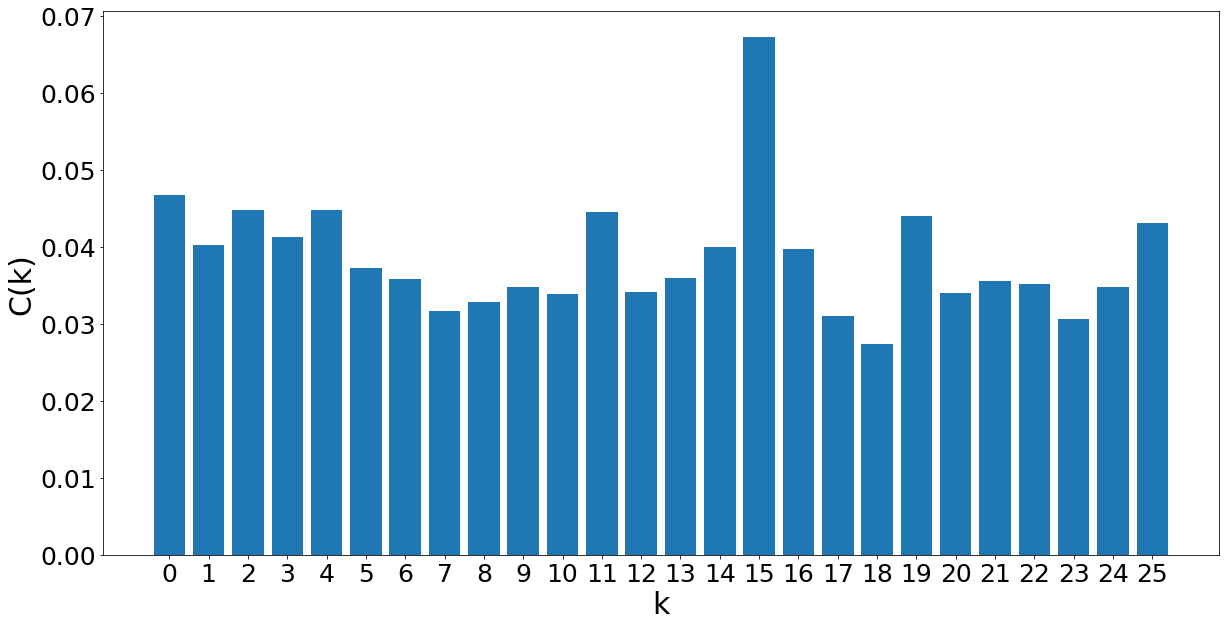

Cross correlation values C(k) for k = 0, 1, 2, ..., 25
[0.047, 0.04, 0.045, 0.041, 0.045, 0.037, 0.036, 0.032, 0.033, 0.035, 0.034, 0.045, 0.034, 0.036, 0.04, 0.067, 0.04, 0.031, 0.027, 0.044, 0.034, 0.036, 0.035, 0.031, 0.035, 0.043]
max C(k):  0.067
Key 0 :  15 

Sub string 1


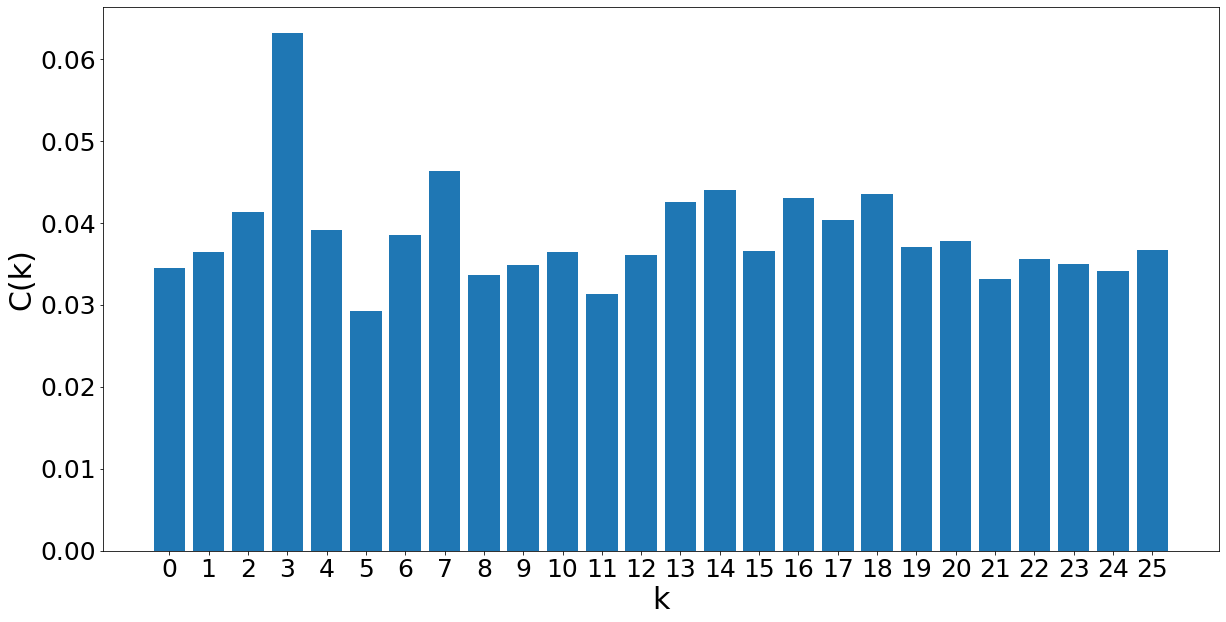

Cross correlation values C(k) for k = 0, 1, 2, ..., 25
[0.034, 0.036, 0.041, 0.063, 0.039, 0.029, 0.039, 0.046, 0.034, 0.035, 0.036, 0.031, 0.036, 0.043, 0.044, 0.037, 0.043, 0.04, 0.043, 0.037, 0.038, 0.033, 0.036, 0.035, 0.034, 0.037]
max C(k):  0.063
Key 1 :  3 

Sub string 2


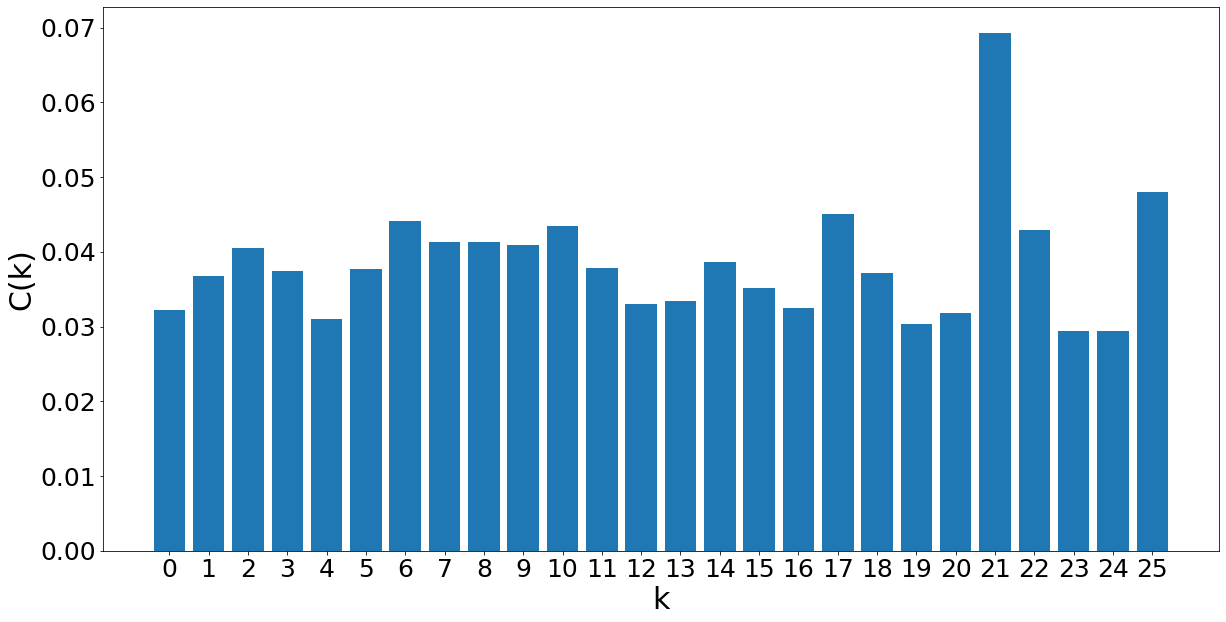

Cross correlation values C(k) for k = 0, 1, 2, ..., 25
[0.032, 0.037, 0.04, 0.037, 0.031, 0.038, 0.044, 0.041, 0.041, 0.041, 0.043, 0.038, 0.033, 0.033, 0.039, 0.035, 0.032, 0.045, 0.037, 0.03, 0.032, 0.069, 0.043, 0.029, 0.029, 0.048]
max C(k):  0.069
Key 2 :  21 

Sub string 3


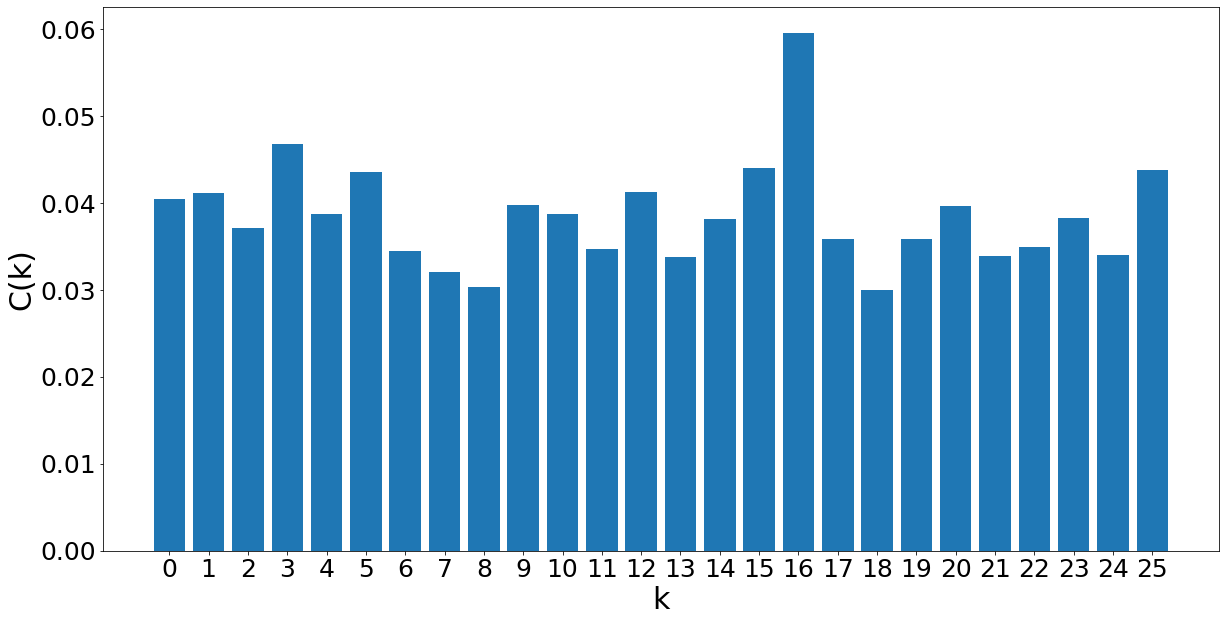

Cross correlation values C(k) for k = 0, 1, 2, ..., 25
[0.04, 0.041, 0.037, 0.047, 0.039, 0.044, 0.034, 0.032, 0.03, 0.04, 0.039, 0.035, 0.041, 0.034, 0.038, 0.044, 0.06, 0.036, 0.03, 0.036, 0.04, 0.034, 0.035, 0.038, 0.034, 0.044]
max C(k):  0.06
Key 3 :  16 



In [11]:
#Enter Key length here 
m = 4

auto_corr_info, hist_info, sub_strings = auto_correlation(text,m)
cross_corr_info = cross_correlation(hist_info)
Key = []
for ii in range(0,m):
    print('Sub string', ii)
    fig, ax = plt.subplots(figsize=(20, 10))
    xticks = [ii for ii in range(26)]
    # create the histogram
    ax.bar(xticks, cross_corr_info[ii])
    ax.set_xticks(xticks)
    #ax.set_xticklabels(xtick_labels)
    ax.set_ylabel('C(k)', fontsize=30)
    ax.set_xlabel('k', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)

    plt.show()
    #print('\n',cross_corr_info[ii])
    max_val = max(cross_corr_info[ii])
    print('Cross correlation values C(k) for k = 0, 1, 2, ..., 25')
    print([round(cross_corr_info[ii][jj],3) for jj in range(0, len(cross_corr_info[ii]))])
    print('max C(k): ', round(max_val,3))
    max_index = cross_corr_info[ii].index(max_val)
    print('Key',ii,': ', max_index,'\n')
    Key.append(max_index)


In [12]:
print('Key:')
print(Key)

Key:
[15, 3, 21, 16]
